In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import textstat


# Load the training data
training_data = pd.read_excel('data/training_set_rel3.xls')
test_data = pd.read_excel('data/valid_set.xls')

In [2]:
training_data

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,NaN,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,21626,8,In most stories mothers and daughters are eit...,17.0,18.0,NaN,35.0,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12974,21628,8,I never understood the meaning laughter is th...,15.0,17.0,NaN,32.0,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",20.0,26.0,40.0,40.0,NaN,NaN,NaN,...,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0
12976,21630,8,Trippin' on fen...,20.0,20.0,NaN,40.0,NaN,NaN,NaN,...,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
test_data

,essay_id,essay_set,essay,domain1_predictionid,domain2_predictionid
0,1788,1,"Dear @ORGANIZATION1, @CAPS1 more and more peop...",1788,NaN
1,1789,1,Dear @LOCATION1 Time @CAPS1 me tell you what I...,1789,NaN
2,1790,1,"Dear Local newspaper, Have you been spending a...",1790,NaN
3,1791,1,"Dear Readers, @CAPS1 you imagine how life woul...",1791,NaN
4,1792,1,"Dear newspaper, I strongly believe that comput...",1792,NaN
...,...,...,...,...,...
4213,21933,8,Have you ever noticed that if two little kids...,24933,NaN
4214,21934,8,Laughter @CAPS1 I ...,24934,NaN
4215,21935,8,Laughter in @CAPS1 A laugh is not just an act...,24935,NaN
4216,21937,8,LAUGHTER @CAPS1 i was younger my friend live...,24937,NaN


In [4]:
simplified_df = training_data[['essay_id', 'essay_set', 'essay','domain1_score','domain2_score']]

In [5]:
test = simplified_df["essay"][4050]

In [7]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Supposons que simplified_df contient vos données
X = simplified_df['essay']
y = simplified_df['essay_set']

# Encodage des labels si nécessaire
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Transformation des textes en vecteurs TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [8]:
from sklearn.utils.class_weight import compute_sample_weight

# Calcul des poids des échantillons pour gérer le déséquilibre
sample_weight = compute_sample_weight(class_weight='balanced', y=y_train)

# Création des objets DMatrix pour XGBoost
dtrain = xgb.DMatrix(X_train_tfidf, label=y_train, weight=sample_weight)
dtest = xgb.DMatrix(X_test_tfidf, label=y_test)

# Configuration des paramètres du modèle
params = {
    'objective': 'multi:softprob',  # Utilisation de softprob pour la classification multi-classe
    'num_class': len(np.unique(y_encoded)),  # Nombre de classes
    'max_depth': 6,  # Profondeur maximale de chaque arbre
    'learning_rate': 0.1,  # Taux d'apprentissage
    'subsample': 0.8,  # Fraction des échantillons à utiliser pour chaque arbre (pour éviter le surajustement)
    'colsample_bytree': 0.8,  # Fraction des caractéristiques à utiliser pour chaque arbre
}

# Entraînement du modèle
model = xgb.train(params, dtrain, num_boost_round=100)

# Prédiction et évaluation
predictions = model.predict(dtest)
predictions = np.argmax(predictions, axis=1)

# Calcul de l'exactitude (vous pouvez également calculer d'autres métriques selon vos besoins)
accuracy = np.sum(predictions == y_test) / y_test.shape[0]
print(f'Accuracy: {accuracy}')

Accuracy: 0.9922958397534669


Accuracy: 0.9931247036510195
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       589
           2       0.99      0.99      0.99       600
           3       0.99      0.99      0.99       568
           4       0.99      0.99      0.99       586
           5       1.00      1.00      1.00       601
           6       1.00      1.00      1.00       600
           7       0.99      0.99      0.99       441
           8       0.99      0.98      0.99       233

    accuracy                           0.99      4218
   macro avg       0.99      0.99      0.99      4218
weighted avg       0.99      0.99      0.99      4218



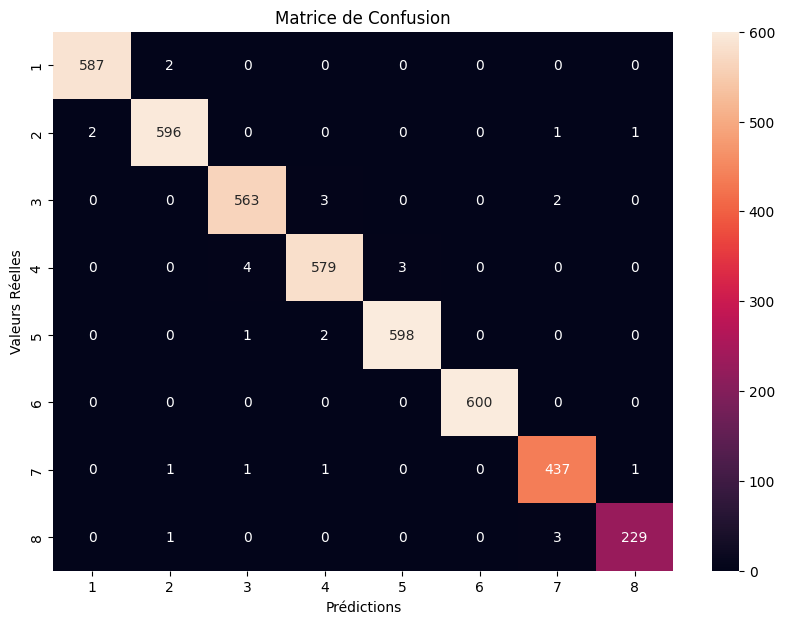

In [9]:

new_X_tfidf = tfidf_vectorizer.transform(test_data['essay'])
new_dmatrix = xgb.DMatrix(new_X_tfidf)
new_predictions = model.predict(new_dmatrix)
new_predicted_classes = np.argmax(new_predictions, axis=1)
new_predicted_labels = label_encoder.inverse_transform(new_predicted_classes)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Calcul de l'exactitude
accuracy = accuracy_score(test_data['essay_set'], new_predicted_labels)
print(f'Accuracy: {accuracy}')

# Affichage du rapport de classification
print(classification_report(test_data['essay_set'], new_predicted_labels))

# Affichage de la matrice de confusion
conf_matrix = confusion_matrix(test_data['essay_set'], new_predicted_labels, labels=label_encoder.classes_)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Valeurs Réelles')
plt.show()

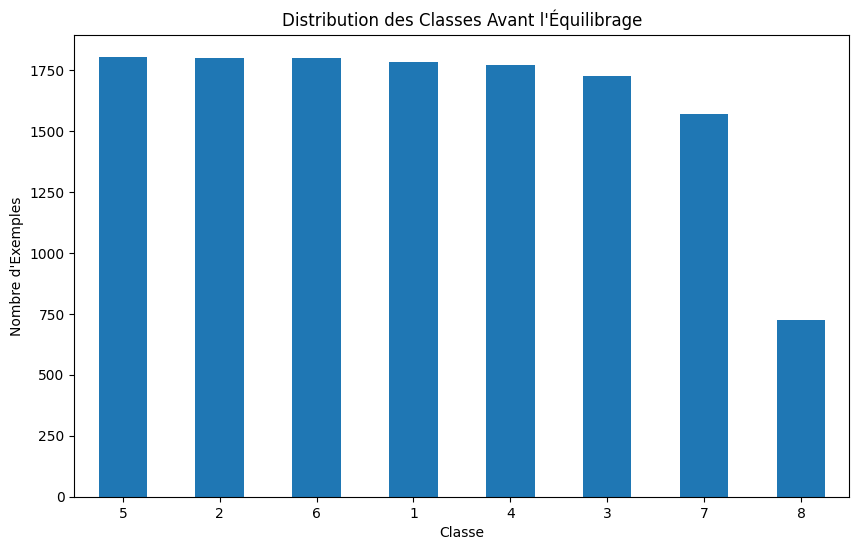

In [10]:
import matplotlib.pyplot as plt

# Distribution des classes avant l'équilibrage
plt.figure(figsize=(10, 6))
simplified_df['essay_set'].value_counts().plot(kind='bar')
plt.title('Distribution des Classes Avant l\'Équilibrage')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'Exemples')
plt.xticks(rotation=0)
plt.show()


In [11]:
# Faire des prédictions
y_pred = np.argmax(model.predict(dtest), axis=1)
# Création d'un DataFrame avec les vraies classes et les prédictions
results_df = pd.DataFrame({'True_Class': y_test, 'Predicted_Class': y_pred})

# Encoder les classes prédites en arrière vers les labels originaux si nécessaire
results_df['True_Class'] = label_encoder.inverse_transform(results_df['True_Class'])
results_df['Predicted_Class'] = label_encoder.inverse_transform(results_df['Predicted_Class'])


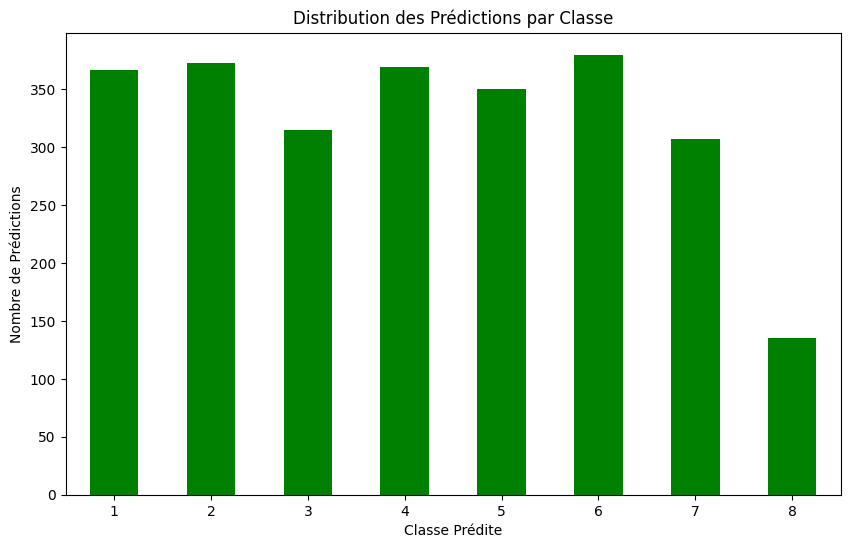

In [12]:
# Distribution des prédictions
plt.figure(figsize=(10, 6))
results_df['Predicted_Class'].value_counts().sort_index().plot(kind='bar', color='green')
plt.title('Distribution des Prédictions par Classe')
plt.xlabel('Classe Prédite')
plt.ylabel('Nombre de Prédictions')
plt.xticks(rotation=0)
plt.show()


In [13]:
#test = "Hello my name is Jordan"
test_1 = tfidf_vectorizer.transform([test])
test_2 = xgb.DMatrix(test_1)

pred = np.argmax(model.predict(test_2),axis=1)

In [14]:
pred

array([2])

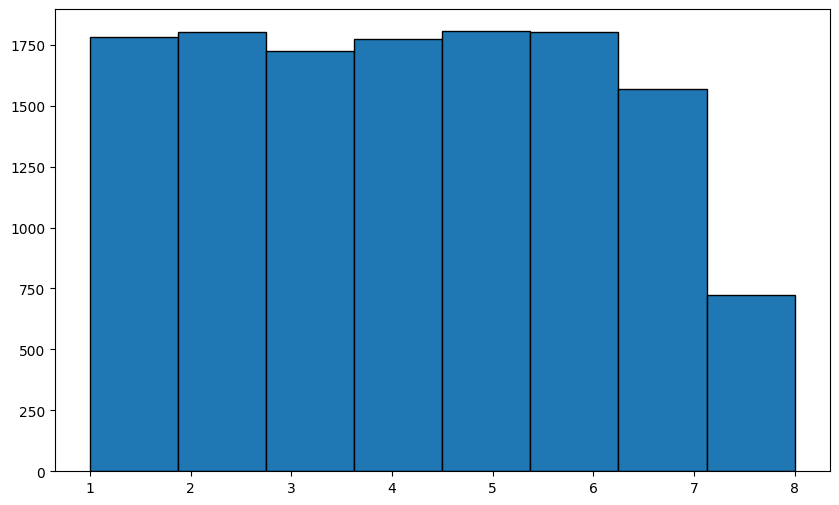

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(simplified_df['essay_set'], bins=8, edgecolor='black')
plt.show()

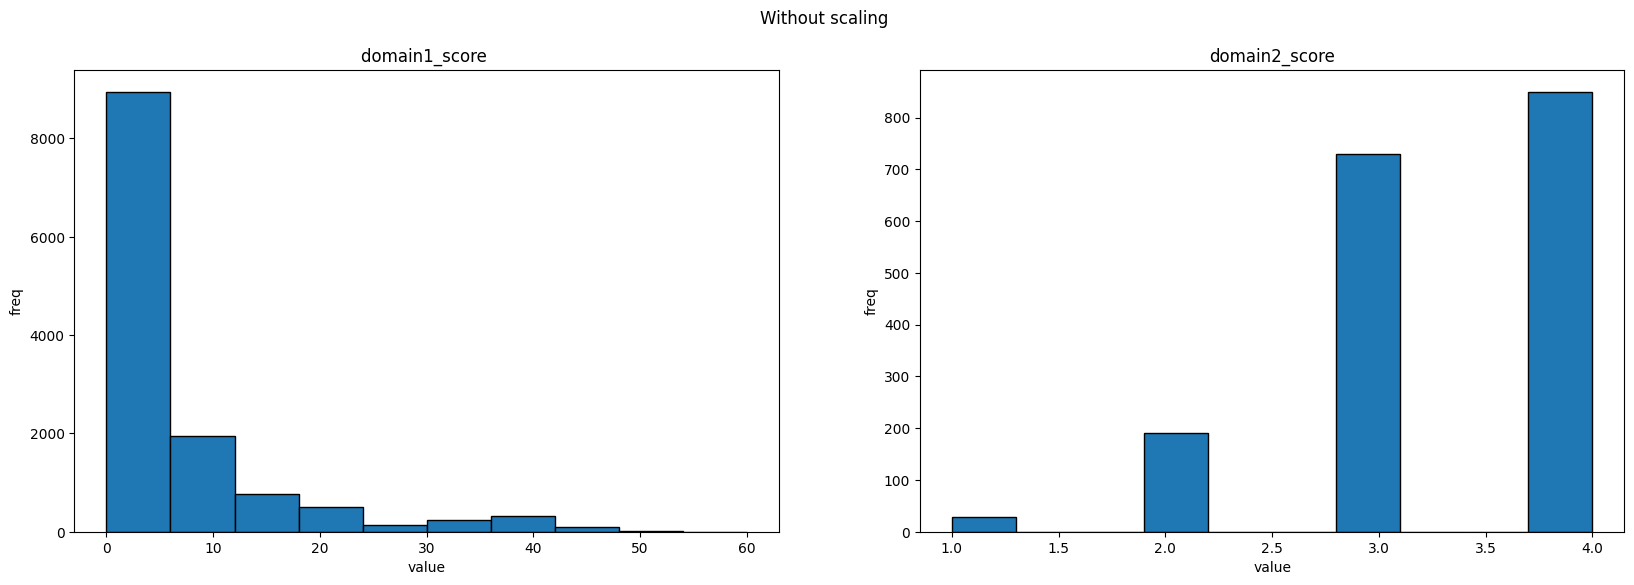

In [16]:
plt.figure(figsize=(20, 6))
plt.suptitle("Without scaling")

plt.subplot(1, 2, 1)
plt.hist(simplified_df['domain1_score'], edgecolor='black')
plt.title('domain1_score ')
plt.xlabel('value')
plt.ylabel('freq')

plt.subplot(1, 2, 2)
plt.hist(simplified_df['domain2_score'], edgecolor='black')
plt.title('domain2_score')
plt.xlabel('value')
plt.ylabel('freq')

plt.show()

In [18]:
scaler = MinMaxScaler(feature_range=(-1,1))
raw_scaling_domain1_score = np.array(simplified_df["domain1_score"]).reshape(-1,1)
scaler.fit(raw_scaling_domain1_score)
simplified_df["raw_scaled_domain1_score"] = scaler.transform(raw_scaling_domain1_score)

/var/folders/nq/zbsywqv94hq7dy3hw12t50yr0000gn/T/ipykernel_86015/1447933149.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simplified_df["raw_scaled_domain1_score"] = scaler.transform(raw_scaling_domain1_score)


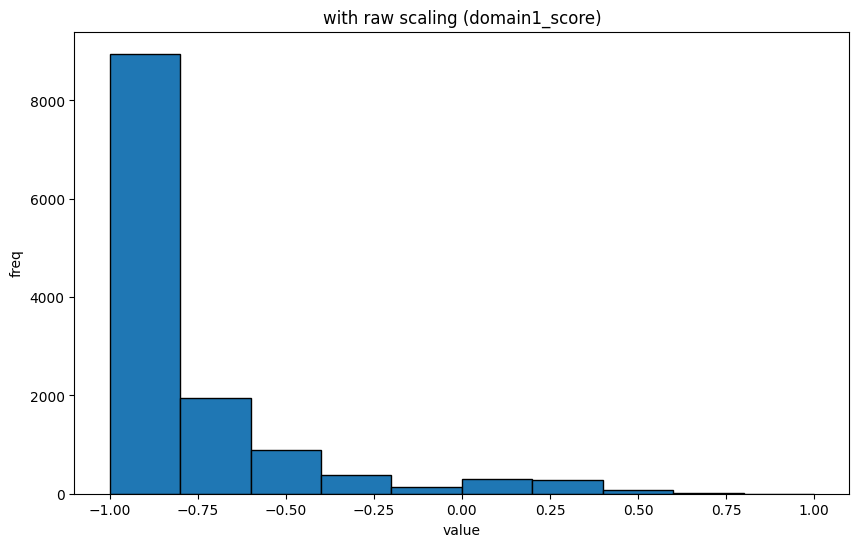

In [19]:
plt.figure(figsize=(10, 6))
plt.title("with raw scaling (domain1_score)")
plt.hist(simplified_df['raw_scaled_domain1_score'], bins=10, edgecolor='black')
plt.xlabel('value')
plt.ylabel('freq')
plt.show()

In [20]:
# domain_score1
scaled_domain1_score_list = []
for i in np.arange(8):
    df_temp = simplified_df[simplified_df["essay_set"]==i+1].copy() # parsing essay set
    domain_score = np.array(df_temp["domain1_score"]).reshape(-1,1) # turning score column in array
    scaler = MinMaxScaler(feature_range=(-1,1)) # scaler
    scaler.fit(domain_score) # fitting ...
    df_temp["scaled_domain1_score"] = scaler.transform(domain_score) # scaling the score column
    scaled_domain1_score_list.append(df_temp["scaled_domain1_score"]) # add the scaled column to lists

simplified_df["scaled_domain1_score"] = pd.concat(scaled_domain1_score_list) # concatenate to add all essay set columns

# domain_score2
scaler2 = MinMaxScaler(feature_range=(-1,1))
x = np.array(simplified_df["domain2_score"]).reshape(-1,1)
scaler2.fit(x)
simplified_df["scaled_domain2_score"] = scaler2.transform(x)

/var/folders/nq/zbsywqv94hq7dy3hw12t50yr0000gn/T/ipykernel_18625/704446160.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simplified_df["scaled_domain1_score"] = pd.concat(scaled_domain1_score_list) # concatenate to add all essay set columns
/var/folders/nq/zbsywqv94hq7dy3hw12t50yr0000gn/T/ipykernel_18625/704446160.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simplified_df["scaled_domain2_score"] = scaler2.transform(x)


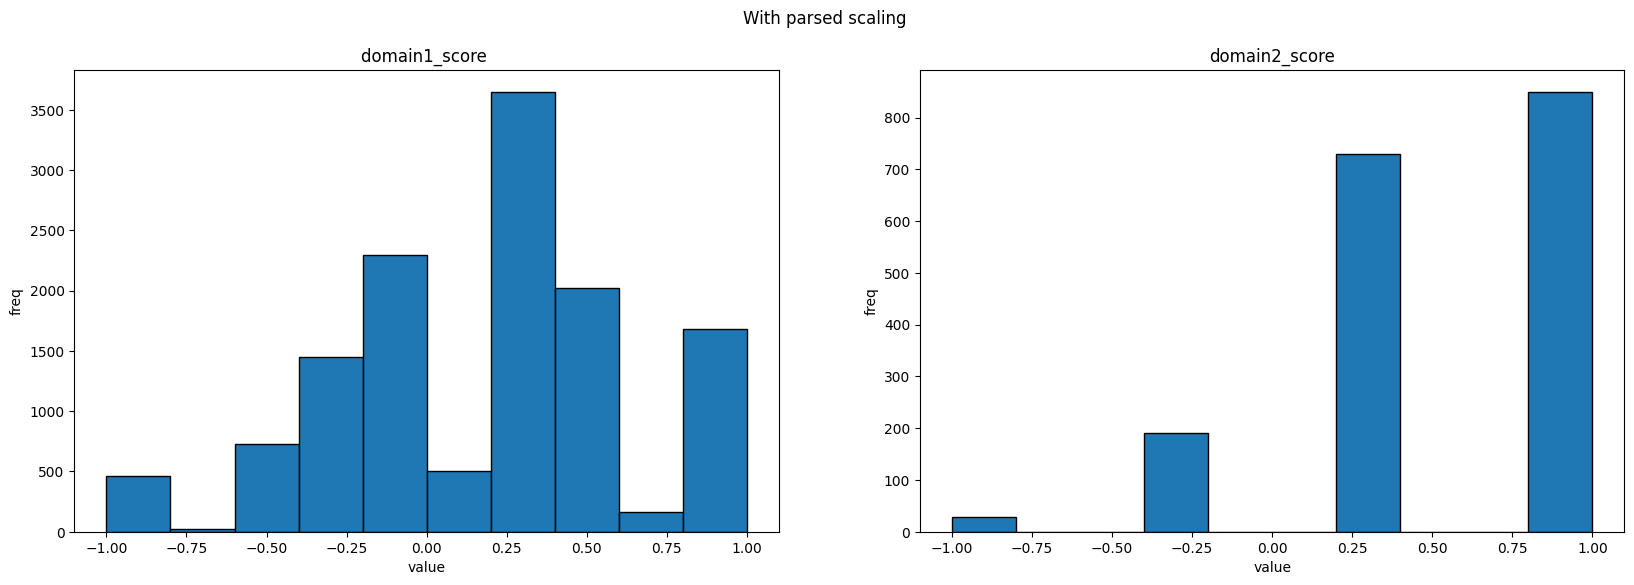

In [21]:
plt.figure(figsize=(20, 6))
plt.suptitle("With parsed scaling")

plt.subplot(1, 2, 1)
plt.hist(simplified_df['scaled_domain1_score'], edgecolor='black')
plt.title('domain1_score ')
plt.xlabel('value')
plt.ylabel('freq')

plt.subplot(1, 2, 2)
plt.hist(simplified_df['scaled_domain2_score'], edgecolor='black')
plt.title('domain2_score')
plt.xlabel('value')
plt.ylabel('freq')

plt.show()

In [22]:
# first row for each set
scaled_df = simplified_df[["essay_id","essay_set","essay","scaled_domain1_score","scaled_domain2_score"]]

In [23]:
def example_for_each_set(df,cut=30):
    displayed_df = pd.DataFrame()
    for i in np.arange(8):
        df_temp = df[df["essay_set"]==i+1].copy()

        displayed_df = pd.concat([displayed_df,df_temp.iloc[[0]]])

    displayed_df["essay"] = displayed_df["essay"].apply(lambda x: x[:cut])
    display(displayed_df)

example_for_each_set(scaled_df)

,essay_id,essay_set,essay,scaled_domain1_score,scaled_domain2_score
0,1,1,"Dear local newspaper, I think",0.200000,NaN
1783,2978,2,Certain materials being remove,0.200000,1.0
3583,5978,3,The features of the setting af,-0.333333,NaN
5309,8863,4,The author concludes the story,-1.000000,NaN
7081,11827,5,In this memoir of Narciso Rodr,0.000000,NaN
8886,14834,6,There were many obstacles that,0.000000,NaN
10686,17834,7,Patience is when your waiting,0.181818,NaN
12255,20716,8,A long time ago when I was in,-0.040000,NaN


In [24]:
def calculate_flesch_reading_ease(text):
    return textstat.flesch_reading_ease(text)

def calculate_gunning_fog(text):
    return textstat.gunning_fog(text)

def calculate_ari(text):
    return textstat.automated_readability_index(text)

def calculate_smog_index(text):
    return textstat.smog_index(text)

def calculate_flesch_kincaid_grade(text):
    return textstat.flesch_kincaid_grade(text)

def calculate_coleman_liau_index(text):
    return textstat.coleman_liau_index(text)

def calculate_dale_chall(text):
    return textstat.dale_chall_readability_score(text)



# Appliquer ces fonctions à la colonne 'essay'
scaled_df['flesch_reading_ease'] = scaled_df['essay'].copy().apply(calculate_flesch_reading_ease)

scaled_df['gunning_fog'] = scaled_df['essay'].copy().apply(calculate_gunning_fog)
scaled_df['ari'] = scaled_df['essay'].copy().apply(calculate_ari)
scaled_df['smog_index'] = scaled_df['essay'].copy().apply(calculate_smog_index)
scaled_df['flesch_kincaid_grade'] = scaled_df['essay'].copy().apply(calculate_flesch_kincaid_grade)
scaled_df['coleman_liau_index'] = scaled_df['essay'].copy().apply(calculate_coleman_liau_index)
scaled_df['dale_chall'] = scaled_df['essay'].copy().apply(calculate_dale_chall)

/var/folders/nq/zbsywqv94hq7dy3hw12t50yr0000gn/T/ipykernel_18625/3249739945.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_df['flesch_reading_ease'] = scaled_df['essay'].copy().apply(calculate_flesch_reading_ease)
/var/folders/nq/zbsywqv94hq7dy3hw12t50yr0000gn/T/ipykernel_18625/3249739945.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_df['gunning_fog'] = scaled_df['essay'].copy().apply(calculate_gunning_fog)


In [25]:
scaled_df

,essay_id,essay_set,essay,scaled_domain1_score,scaled_domain2_score,flesch_reading_ease,gunning_fog,ari,smog_index,flesch_kincaid_grade,coleman_liau_index,dale_chall
0,1,1,"Dear local newspaper, I think effects computer...",2.000000e-01,NaN,74.02,10.31,11.3,10.2,8.5,8.54,7.00
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",4.000000e-01,NaN,67.08,10.21,10.1,11.6,9.1,7.95,7.28
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",2.220446e-16,NaN,68.20,10.25,9.9,12.0,8.7,8.30,7.62
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",6.000000e-01,NaN,60.24,10.81,12.0,12.3,9.7,10.97,8.34
4,5,1,"Dear @LOCATION1, I know having computers has a...",2.000000e-01,NaN,72.66,8.01,7.7,11.1,7.0,8.00,6.51
...,...,...,...,...,...,...,...,...,...,...,...,...
12973,21626,8,In most stories mothers and daughters are eit...,2.220446e-16,NaN,65.09,13.56,14.4,10.3,12.0,7.03,6.98
12974,21628,8,I never understood the meaning laughter is th...,-1.200000e-01,NaN,91.11,5.97,5.1,7.1,4.0,4.98,6.01
12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",2.000000e-01,NaN,69.11,9.46,9.9,9.7,8.3,8.18,7.15
12976,21630,8,Trippin' on fen...,2.000000e-01,NaN,81.83,7.41,6.8,8.5,5.5,6.55,6.70


In [11]:
example_for_each_set(scaled_df,cut=5)

,essay_id,essay_set,essay,scaled_domain1_score,scaled_domain2_score,flesch_reading_ease,gunning_fog,ari,smog_index,flesch_kincaid_grade,coleman_liau_index,dale_chall
0,1,1,Dear,0.200000,NaN,74.02,10.31,11.3,10.2,8.5,8.54,7.00
1783,2978,2,Certa,0.200000,1.0,72.70,10.19,11.7,9.5,9.0,8.36,6.58
3583,5978,3,The f,-0.333333,NaN,71.14,8.37,6.7,7.8,7.6,6.20,7.58
5309,8863,4,The a,-1.000000,NaN,69.41,8.91,8.8,10.5,8.2,7.89,6.82
7081,11827,5,In th,0.000000,NaN,77.67,9.38,10.0,9.2,7.1,8.36,8.04
8886,14834,6,There,0.000000,NaN,59.33,10.74,10.9,11.5,10.0,9.40,8.01
10686,17834,7,Patie,0.181818,NaN,88.53,3.28,3.5,4.9,2.9,5.24,5.97
12255,20716,8,A lo,-0.040000,NaN,88.87,6.90,6.1,7.0,4.9,5.10,5.87


In [39]:
scaled_df

,essay_id,essay_set,essay,scaled_domain1_score,scaled_domain2_score,flesch_reading_ease,gunning_fog,ari,smog_index,flesch_kincaid_grade,coleman_liau_index,dale_chall,AWL Score
0,1,1,"Dear local newspaper, I think effects computer...",2.000000e-01,NaN,74.02,10.31,11.3,10.2,8.5,8.54,7.00,11.3
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",4.000000e-01,NaN,67.08,10.21,10.1,11.6,9.1,7.95,7.28,10.1
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",2.220446e-16,NaN,68.20,10.25,9.9,12.0,8.7,8.30,7.62,9.9
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",6.000000e-01,NaN,60.24,10.81,12.0,12.3,9.7,10.97,8.34,12.0
4,5,1,"Dear @LOCATION1, I know having computers has a...",2.000000e-01,NaN,72.66,8.01,7.7,11.1,7.0,8.00,6.51,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,21626,8,In most stories mothers and daughters are eit...,2.220446e-16,NaN,65.09,13.56,14.4,10.3,12.0,7.03,6.98,14.4
12974,21628,8,I never understood the meaning laughter is th...,-1.200000e-01,NaN,91.11,5.97,5.1,7.1,4.0,4.98,6.01,5.1
12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",2.000000e-01,NaN,69.11,9.46,9.9,9.7,8.3,8.18,7.15,9.9
12976,21630,8,Trippin' on fen...,2.000000e-01,NaN,81.83,7.41,6.8,8.5,5.5,6.55,6.70,6.8


In [42]:

def calculate_awl_score(text):
    return textstat.automated_readability_index(text)

def calculate_lexical_diversity(text):
    words = text.split()
    unique_words = set(words)
    return len(unique_words) / len(words)


def calculate_pos_ratios(text):
    pos_tags = textstat.get_pos_tags(text)

    adjective_count = sum(1 for _, tag in pos_tags if tag.startswith('JJ'))
    noun_count = sum(1 for _, tag in pos_tags if tag.startswith('NN'))
    verb_count = sum(1 for _, tag in pos_tags if tag.startswith('VB'))

    total_words = len(pos_tags)
    adjective_ratio = adjective_count / total_words
    noun_ratio = noun_count / total_words
    verb_ratio = verb_count / total_words

    return {
        "Adjective Ratio": adjective_ratio,
        "Noun Ratio": noun_ratio,
        "Verb Ratio": verb_ratio
    }

def analyze_text(text):
    awl_score = calculate_awl_score(text)
    lexical_diversity = calculate_lexical_diversity(text)
    pos_ratios = calculate_pos_ratios(text)

    return {
        "AWL Score": awl_score,
        "Lexical Diversity": lexical_diversity,
        **pos_ratios
    }

# Apply the transformations to each row in the DataFrame
scaled_df['AWL Score'] = scaled_df['essay'].apply(lambda x: calculate_awl_score(x))
scaled_df['Lexical Diversity'] = scaled_df['essay'].apply(lambda x: calculate_lexical_diversity(x))


In [56]:
#!pip install spacy
#!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 2.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 11.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.1/493.1 kB 9.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.3/880.3 kB 10.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 14.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.4 MB/s eta 0:00:00


In [93]:
import pandas as pd
import spacy
from spacy.lang.en import English

# Explicitly load spaCy English model with only the tagger component
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Sample DataFrame with an 'essay' column
data = {'essay': ['This is a sample essay.', 'Another example here.', 'Yet another piece of text.']}
df = pd.DataFrame(data)

def calculate_lexical_variation_ratios(text):
    # Process the text with spaCy
    doc = nlp(text)

    # Calculate the total number of words
    total_words = len([token for token in doc if token.is_alpha])

    # Initialize counts for adjectives, nouns, and verbs
    adjective_count = 0
    noun_count = 0
    verb_count = 0

    # Get the counts of adjectives, nouns, and verbs
    for token in doc:
        #print(f"Token: {token.text}, POS: {token.pos_}")  # Added for debugging

        if token.pos_ == 'ADJ':
            adjective_count += 1
        elif token.pos_ == 'NOUN':
            noun_count += 1
        elif token.pos_ == 'VERB':
            verb_count += 1

    # Calculate ratios
    adjective_ratio = adjective_count / total_words
    noun_ratio = noun_count / total_words
    verb_ratio = verb_count / total_words

    return {
        'Adjective_Ratio': adjective_ratio,
        'Noun_Ratio': noun_ratio,
        'Verb_Ratio': verb_ratio
    }

# Apply the transformations to each row in the DataFrame
df = pd.concat([scaled_df, pd.DataFrame(scaled_df['essay'].apply(calculate_lexical_variation_ratios).tolist())], axis=1)

df

,essay_id,essay_set,essay,scaled_domain1_score,scaled_domain2_score,flesch_reading_ease,gunning_fog,ari,smog_index,flesch_kincaid_grade,coleman_liau_index,dale_chall,AWL Score,Lexical Diversity,Adjective_Ratio,Noun_Ratio,Verb_Ratio
0,1,1,"Dear local newspaper, I think effects computer...",2.000000e-01,NaN,74.02,10.31,11.3,10.2,8.5,8.54,7.00,11.3,0.544379,0.052941,0.226471,0.135294
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",4.000000e-01,NaN,67.08,10.21,10.1,11.6,9.1,7.95,7.28,10.1,0.515513,0.053659,0.243902,0.163415
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",2.220446e-16,NaN,68.20,10.25,9.9,12.0,8.7,8.30,7.62,9.9,0.598566,0.069853,0.261029,0.136029
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",6.000000e-01,NaN,60.24,10.81,12.0,12.3,9.7,10.97,8.34,12.0,0.524809,0.082474,0.278351,0.144330
4,5,1,"Dear @LOCATION1, I know having computers has a...",2.000000e-01,NaN,72.66,8.01,7.7,11.1,7.0,8.00,6.51,7.7,0.486022,0.064795,0.235421,0.116631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,21626,8,In most stories mothers and daughters are eit...,2.220446e-16,NaN,65.09,13.56,14.4,10.3,12.0,7.03,6.98,14.4,0.450888,0.054362,0.160556,0.141593
12974,21628,8,I never understood the meaning laughter is th...,-1.200000e-01,NaN,91.11,5.97,5.1,7.1,4.0,4.98,6.01,5.1,0.478022,0.074074,0.192982,0.130604
12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",2.000000e-01,NaN,69.11,9.46,9.9,9.7,8.3,8.18,7.15,9.9,0.504284,0.050649,0.187013,0.146753
12976,21630,8,Trippin' on fen...,2.000000e-01,NaN,81.83,7.41,6.8,8.5,5.5,6.55,6.70,6.8,0.517794,0.079336,0.149446,0.116236


In [96]:

# Load spaCy English model with sentencizer
nlp = spacy.load("en_core_web_sm")
sentencizer = nlp.add_pipe('sentencizer')

# Define the transformation functions
def get_sentence_tree_roots(text):
    doc = nlp(text)
    roots = [token.text for token in doc if token.dep_ == "ROOT"]
    return roots

def get_sentence_tree_length(text):
    doc = nlp(text)
    return len(list(doc.sents))

def get_average_connections_at_root(text):
    doc = nlp(text)
    root_connections = [len(list(token.children)) for token in doc if token.dep_ == "ROOT"]
    return sum(root_connections) / len(root_connections) if root_connections else 0

def get_length_of_clauses(text):
    doc = nlp(text)
    clauses_lengths = [len(list(token.subtree)) for token in doc if token.dep_.endswith('cl')]
    return sum(clauses_lengths) / len(clauses_lengths) if clauses_lengths else 0

# Apply transformations to create new columns
df['Sentence_Tree_Roots'] = df['essay'].apply(get_sentence_tree_roots)
df['Sentence_Tree_Length'] = df['essay'].apply(get_sentence_tree_length)
df['Avg_Connections_at_Root'] = df['essay'].apply(get_average_connections_at_root)
df['Length_of_Clauses'] = df['essay'].apply(get_length_of_clauses)


In [100]:
transformed_df_spacy = df.copy()

In [101]:
transformed_df_spacy

,essay_id,essay_set,essay,scaled_domain1_score,scaled_domain2_score,flesch_reading_ease,gunning_fog,ari,smog_index,flesch_kincaid_grade,...,dale_chall,AWL Score,Lexical Diversity,Adjective_Ratio,Noun_Ratio,Verb_Ratio,Sentence_Tree_Roots,Sentence_Tree_Length,Avg_Connections_at_Root,Length_of_Clauses
0,1,1,"Dear local newspaper, I think effects computer...",2.000000e-01,NaN,74.02,10.31,11.3,10.2,8.5,...,7.00,11.3,0.544379,0.052941,0.226471,0.135294,"[helps, Thing, think, feel, time, 's, think, l...",16,4.750000,8.750000
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",4.000000e-01,NaN,67.08,10.21,10.1,11.6,9.1,...,7.28,10.1,0.515513,0.053659,0.243902,0.163415,"[believe, help, benefit, go, help, have, belie...",20,4.900000,11.705882
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",2.220446e-16,NaN,68.20,10.25,9.9,12.0,8.7,...,7.62,9.9,0.598566,0.069853,0.261029,0.136029,"[use, believe, have, using, is, are, get, want...",15,4.400000,11.600000
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",6.000000e-01,NaN,60.24,10.81,12.0,12.3,9.7,...,8.34,12.0,0.524809,0.082474,0.278351,0.144330,"[found, is, get, refer, help, allowed, said, p...",27,4.666667,10.437500
4,5,1,"Dear @LOCATION1, I know having computers has a...",2.000000e-01,NaN,72.66,8.01,7.7,11.1,7.0,...,6.51,7.7,0.486022,0.064795,0.235421,0.116631,"[know, connect, are, help, love, helps, is, be...",30,4.766667,7.230769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,21626,8,In most stories mothers and daughters are eit...,2.220446e-16,NaN,65.09,13.56,14.4,10.3,12.0,...,6.98,14.4,0.450888,0.054362,0.160556,0.141593,"[were, @CAPS4, 'm, 's, mom, punish, work, chos...",41,4.658537,9.945946
12974,21628,8,I never understood the meaning laughter is th...,-1.200000e-01,NaN,91.11,5.97,5.1,7.1,4.0,...,6.01,5.1,0.478022,0.074074,0.192982,0.130604,"[tell, started, was, was, met, grew, show, had...",39,5.461538,4.684211
12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",2.000000e-01,NaN,69.11,9.46,9.9,9.7,8.3,...,7.15,9.9,0.504284,0.050649,0.187013,0.146753,"[is, are, Is, 'm, not, is, makes, joke, be, ha...",45,5.177778,9.911111
12976,21630,8,Trippin' on fen...,2.000000e-01,NaN,81.83,7.41,6.8,8.5,5.5,...,6.70,6.8,0.517794,0.079336,0.149446,0.116236,"[laughing, was, said, 's, get, was, hanging, s...",39,5.717949,7.142857


### nltk transformation

In [103]:
%%time
import pandas as pd
import nltk
from nltk import sent_tokenize, word_tokenize, pos_tag, RegexpParser
from nltk.corpus import stopwords

# Download NLTK resources (run this once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

# Define the transformation functions
def get_sentence_tree_roots(text):
    words = word_tokenize(text)
    pos_tags = pos_tag(words)
    grammar = "NP: {<DT>?<JJ>*<NN>}"
    chunk_parser = RegexpParser(grammar)
    tree = chunk_parser.parse(pos_tags)
    roots = [subtree.label() for subtree in tree.subtrees() if subtree.label() == 'NP']
    return roots

def get_sentence_tree_length(text):
    sentences = sent_tokenize(text)
    return len(sentences)

def get_average_connections_at_root(text):
    words = word_tokenize(text)
    pos_tags = pos_tag(words)
    grammar = "NP: {<DT>?<JJ>*<NN>}"
    chunk_parser = RegexpParser(grammar)
    tree = chunk_parser.parse(pos_tags)
    root_connections = [len(subtree) for subtree in tree.subtrees() if subtree.label() == 'NP']
    return sum(root_connections) / len(root_connections) if root_connections else 0

def get_length_of_clauses(text):
    words = word_tokenize(text)
    pos_tags = pos_tag(words)
    grammar = "CL: {<RB>?<VB.*><DT>?<JJ>*<NN>}"
    chunk_parser = RegexpParser(grammar)
    tree = chunk_parser.parse(pos_tags)
    clauses_lengths = [len(subtree) for subtree in tree.subtrees() if subtree.label() == 'CL']
    return sum(clauses_lengths) / len(clauses_lengths) if clauses_lengths else 0

# Apply transformations to create new columns
df['Sentence_Tree_Roots'] = df['essay'].apply(get_sentence_tree_roots)
df['Sentence_Tree_Length'] = df['essay'].apply(get_sentence_tree_length)
df['Avg_Connections_at_Root'] = df['essay'].apply(get_average_connections_at_root)
df['Length_of_Clauses'] = df['essay'].apply(get_length_of_clauses)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/suleimanadebowaleojo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/suleimanadebowaleojo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/suleimanadebowaleojo/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


CPU times: user 6min 14s, sys: 5.55 s, total: 6min 19s
Wall time: 6min 26s


In [104]:
transformed_df_nltk = df.copy()

In [105]:
transformed_df_nltk

,essay_id,essay_set,essay,scaled_domain1_score,scaled_domain2_score,flesch_reading_ease,gunning_fog,ari,smog_index,flesch_kincaid_grade,...,dale_chall,AWL Score,Lexical Diversity,Adjective_Ratio,Noun_Ratio,Verb_Ratio,Sentence_Tree_Roots,Sentence_Tree_Length,Avg_Connections_at_Root,Length_of_Clauses
0,1,1,"Dear local newspaper, I think effects computer...",2.000000e-01,NaN,74.02,10.31,11.3,10.2,8.5,...,7.00,11.3,0.544379,0.052941,0.226471,0.135294,"[NP, NP, NP, NP, NP, NP, NP, NP, NP, NP, NP, N...",16,1.436364,3.166667
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",4.000000e-01,NaN,67.08,10.21,10.1,11.6,9.1,...,7.28,10.1,0.515513,0.053659,0.243902,0.163415,"[NP, NP, NP, NP, NP, NP, NP, NP, NP, NP, NP, N...",20,1.454545,2.916667
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",2.220446e-16,NaN,68.20,10.25,9.9,12.0,8.7,...,7.62,9.9,0.598566,0.069853,0.261029,0.136029,"[NP, NP, NP, NP, NP, NP, NP, NP, NP, NP, NP, N...",14,1.564103,2.727273
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",6.000000e-01,NaN,60.24,10.81,12.0,12.3,9.7,...,8.34,12.0,0.524809,0.082474,0.278351,0.144330,"[NP, NP, NP, NP, NP, NP, NP, NP, NP, NP, NP, N...",27,1.493151,3.000000
4,5,1,"Dear @LOCATION1, I know having computers has a...",2.000000e-01,NaN,72.66,8.01,7.7,11.1,7.0,...,6.51,7.7,0.486022,0.064795,0.235421,0.116631,"[NP, NP, NP, NP, NP, NP, NP, NP, NP, NP, NP, N...",30,1.621212,2.722222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,21626,8,In most stories mothers and daughters are eit...,2.220446e-16,NaN,65.09,13.56,14.4,10.3,12.0,...,6.98,14.4,0.450888,0.054362,0.160556,0.141593,"[NP, NP, NP, NP, NP, NP, NP, NP, NP, NP, NP, N...",27,1.478261,3.142857
12974,21628,8,I never understood the meaning laughter is th...,-1.200000e-01,NaN,91.11,5.97,5.1,7.1,4.0,...,6.01,5.1,0.478022,0.074074,0.192982,0.130604,"[NP, NP, NP, NP, NP, NP, NP, NP, NP, NP, NP, N...",35,1.493671,3.000000
12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",2.000000e-01,NaN,69.11,9.46,9.9,9.7,8.3,...,7.15,9.9,0.504284,0.050649,0.187013,0.146753,"[NP, NP, NP, NP, NP, NP, NP, NP, NP, NP, NP, N...",41,1.681818,2.900000
12976,21630,8,Trippin' on fen...,2.000000e-01,NaN,81.83,7.41,6.8,8.5,5.5,...,6.70,6.8,0.517794,0.079336,0.149446,0.116236,"[NP, NP, NP, NP, NP, NP, NP, NP, NP, NP, NP, N...",39,1.585714,3.333333


### SpaCy for misspelling detection, slur usage, and overusage of punctuation

In [106]:
%%time
import pandas as pd
import spacy
from collections import Counter

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Function to calculate misspelling score
def calculate_misspelling_score(text):
    doc = nlp(text)
    # Extract tokens that are considered misspelled
    misspelled_tokens = [token.text.lower() for token in doc if token.is_oov]
    # Calculate misspelling score as the ratio of misspelled tokens to total tokens
    misspelling_score = len(misspelled_tokens) / len(doc) if len(doc) > 0 else 0
    return misspelling_score

# Function to detect slur usage
def detect_slur_usage(text):
    # You can customize this list with slurs or offensive words
    slurs = ["slur1", "slur2", "slur3"]
    doc = nlp(text.lower())
    slur_count = sum(1 for token in doc if token.text in slurs)
    return slur_count

# Function to calculate overusage of punctuation
def calculate_overusage_of_punctuation(text):
    doc = nlp(text)
    # Extract punctuation tokens
    punctuation_tokens = [token.text for token in doc if token.is_punct]
    # Calculate overusage of punctuation as the ratio of punctuation tokens to total tokens
    overusage_score = len(punctuation_tokens) / len(doc) if len(doc) > 0 else 0
    return overusage_score

# Apply transformations to create new columns
transformed_df_spacy['Misspelling_Score'] = transformed_df_spacy['essay'].apply(calculate_misspelling_score)
transformed_df_spacy['Slur_Usage'] = transformed_df_spacy['essay'].apply(detect_slur_usage)
transformed_df_spacy['Overusage_of_Punctuation'] = transformed_df_spacy['essay'].apply(calculate_overusage_of_punctuation)


CPU times: user 21min 13s, sys: 1min 57s, total: 23min 11s
Wall time: 23min 31s


In [107]:
transformed_df_spacy

,essay_id,essay_set,essay,scaled_domain1_score,scaled_domain2_score,flesch_reading_ease,gunning_fog,ari,smog_index,flesch_kincaid_grade,...,Adjective_Ratio,Noun_Ratio,Verb_Ratio,Sentence_Tree_Roots,Sentence_Tree_Length,Avg_Connections_at_Root,Length_of_Clauses,Misspelling_Score,Slur_Usage,Overusage_of_Punctuation
0,1,1,"Dear local newspaper, I think effects computer...",2.000000e-01,NaN,74.02,10.31,11.3,10.2,8.5,...,0.052941,0.226471,0.135294,"[helps, Thing, think, feel, time, 's, think, l...",16,4.750000,8.750000,1.0,0,0.111392
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",4.000000e-01,NaN,67.08,10.21,10.1,11.6,9.1,...,0.053659,0.243902,0.163415,"[believe, help, benefit, go, help, have, belie...",20,4.900000,11.705882,1.0,0,0.072368
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",2.220446e-16,NaN,68.20,10.25,9.9,12.0,8.7,...,0.069853,0.261029,0.136029,"[use, believe, have, using, is, are, get, want...",15,4.400000,11.600000,1.0,0,0.075163
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",6.000000e-01,NaN,60.24,10.81,12.0,12.3,9.7,...,0.082474,0.278351,0.144330,"[found, is, get, refer, help, allowed, said, p...",27,4.666667,10.437500,1.0,0,0.079861
4,5,1,"Dear @LOCATION1, I know having computers has a...",2.000000e-01,NaN,72.66,8.01,7.7,11.1,7.0,...,0.064795,0.235421,0.116631,"[know, connect, are, help, love, helps, is, be...",30,4.766667,7.230769,1.0,0,0.088803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,21626,8,In most stories mothers and daughters are eit...,2.220446e-16,NaN,65.09,13.56,14.4,10.3,12.0,...,0.054362,0.160556,0.141593,"[were, @CAPS4, 'm, 's, mom, punish, work, chos...",41,4.658537,9.945946,1.0,0,0.092340
12974,21628,8,I never understood the meaning laughter is th...,-1.200000e-01,NaN,91.11,5.97,5.1,7.1,4.0,...,0.074074,0.192982,0.130604,"[tell, started, was, was, met, grew, show, had...",39,5.461538,4.684211,1.0,0,0.121260
12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",2.000000e-01,NaN,69.11,9.46,9.9,9.7,8.3,...,0.050649,0.187013,0.146753,"[is, are, Is, 'm, not, is, makes, joke, be, ha...",45,5.177778,9.911111,1.0,0,0.125654
12976,21630,8,Trippin' on fen...,2.000000e-01,NaN,81.83,7.41,6.8,8.5,5.5,...,0.079336,0.149446,0.116236,"[laughing, was, said, 's, get, was, hanging, s...",39,5.717949,7.142857,1.0,0,0.132132


### misspelling detection, slur usage, and overusage of punctuation using NLTK

In [109]:
%%time

import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import words
import string  # Add this import for the 'string' module

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('words')

# Load the English words set for misspelling detection
english_words = set(words.words())

# Function to calculate misspelling score
def calculate_misspelling_score(text):
    tokens = word_tokenize(text.lower())
    # Extract tokens that are not in the English words set
    misspelled_tokens = [token for token in tokens if token not in english_words]
    # Calculate misspelling score as the ratio of misspelled tokens to total tokens
    misspelling_score = len(misspelled_tokens) / len(tokens) if len(tokens) > 0 else 0
    return misspelling_score

# Function to detect slur usage
def detect_slur_usage(text):
    # You can customize this list with slurs or offensive words
    slurs = ["slur1", "slur2", "slur3"]
    tokens = word_tokenize(text.lower())
    slur_count = sum(1 for token in tokens if token in slurs)
    return slur_count

# Function to calculate overusage of punctuation
def calculate_overusage_of_punctuation(text):
    tokens = word_tokenize(text)
    # Extract punctuation tokens
    punctuation_tokens = [token for token in tokens if token in string.punctuation]
    # Calculate overusage of punctuation as the ratio of punctuation tokens to total tokens
    overusage_score = len(punctuation_tokens) / len(tokens) if len(tokens) > 0 else 0
    return overusage_score

# Apply transformations to create new columns
transformed_df_nltk['Misspelling_Score'] = transformed_df_nltk['essay'].apply(calculate_misspelling_score)
transformed_df_nltk['Slur_Usage'] = transformed_df_nltk['essay'].apply(detect_slur_usage)
transformed_df_nltk['Overusage_of_Punctuation'] = transformed_df_nltk['essay'].apply(calculate_overusage_of_punctuation)



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/suleimanadebowaleojo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/suleimanadebowaleojo/nltk_data...
[nltk_data]   Package words is already up-to-date!


CPU times: user 1min 7s, sys: 627 ms, total: 1min 8s
Wall time: 1min 9s


In [111]:
# Display the modified DataFrame
transformed_df_nltk


,essay_id,essay_set,essay,scaled_domain1_score,scaled_domain2_score,flesch_reading_ease,gunning_fog,ari,smog_index,flesch_kincaid_grade,...,Adjective_Ratio,Noun_Ratio,Verb_Ratio,Sentence_Tree_Roots,Sentence_Tree_Length,Avg_Connections_at_Root,Length_of_Clauses,Misspelling_Score,Slur_Usage,Overusage_of_Punctuation
0,1,1,"Dear local newspaper, I think effects computer...",2.000000e-01,NaN,74.02,10.31,11.3,10.2,8.5,...,0.052941,0.226471,0.135294,"[NP, NP, NP, NP, NP, NP, NP, NP, NP, NP, NP, N...",16,1.436364,3.166667,0.235751,0,0.111399
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",4.000000e-01,NaN,67.08,10.21,10.1,11.6,9.1,...,0.053659,0.243902,0.163415,"[NP, NP, NP, NP, NP, NP, NP, NP, NP, NP, NP, N...",20,1.454545,2.916667,0.254310,0,0.090517
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",2.220446e-16,NaN,68.20,10.25,9.9,12.0,8.7,...,0.069853,0.261029,0.136029,"[NP, NP, NP, NP, NP, NP, NP, NP, NP, NP, NP, N...",14,1.564103,2.727273,0.242812,0,0.095847
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",6.000000e-01,NaN,60.24,10.81,12.0,12.3,9.7,...,0.082474,0.278351,0.144330,"[NP, NP, NP, NP, NP, NP, NP, NP, NP, NP, NP, N...",27,1.493151,3.000000,0.343699,0,0.132570
4,5,1,"Dear @LOCATION1, I know having computers has a...",2.000000e-01,NaN,72.66,8.01,7.7,11.1,7.0,...,0.064795,0.235421,0.116631,"[NP, NP, NP, NP, NP, NP, NP, NP, NP, NP, NP, N...",30,1.621212,2.722222,0.220503,0,0.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,21626,8,In most stories mothers and daughters are eit...,2.220446e-16,NaN,65.09,13.56,14.4,10.3,12.0,...,0.054362,0.160556,0.141593,"[NP, NP, NP, NP, NP, NP, NP, NP, NP, NP, NP, N...",27,1.478261,3.142857,0.278054,0,0.133069
12974,21628,8,I never understood the meaning laughter is th...,-1.200000e-01,NaN,91.11,5.97,5.1,7.1,4.0,...,0.074074,0.192982,0.130604,"[NP, NP, NP, NP, NP, NP, NP, NP, NP, NP, NP, N...",35,1.493671,3.000000,0.270270,0,0.142643
12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",2.000000e-01,NaN,69.11,9.46,9.9,9.7,8.3,...,0.050649,0.187013,0.146753,"[NP, NP, NP, NP, NP, NP, NP, NP, NP, NP, NP, N...",41,1.681818,2.900000,0.302909,0,0.152457
12976,21630,8,Trippin' on fen...,2.000000e-01,NaN,81.83,7.41,6.8,8.5,5.5,...,0.079336,0.149446,0.116236,"[NP, NP, NP, NP, NP, NP, NP, NP, NP, NP, NP, N...",39,1.585714,3.333333,0.261696,0,0.144737
